# HMMS POS Tagging

In [33]:
from __future__ import print_function
import nltk
import math
import numpy as np
import sys
from nltk.corpus import brown
from nltk.corpus import nps_chat
from nltk.corpus import conll2000
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
nps_chat.tagged_posts()

[[(u'now', 'RB'), (u'im', 'PRP'), (u'left', 'VBD'), (u'with', 'IN'), (u'this', 'DT'), (u'gay', 'JJ'), (u'name', 'NN')], [(u':P', 'UH')], ...]

In [3]:
conll2000.tagged_sents()

[[(u'Confidence', u'NN'), (u'in', u'IN'), (u'the', u'DT'), (u'pound', u'NN'), (u'is', u'VBZ'), (u'widely', u'RB'), (u'expected', u'VBN'), (u'to', u'TO'), (u'take', u'VB'), (u'another', u'DT'), (u'sharp', u'JJ'), (u'dive', u'NN'), (u'if', u'IN'), (u'trade', u'NN'), (u'figures', u'NNS'), (u'for', u'IN'), (u'September', u'NNP'), (u',', u','), (u'due', u'JJ'), (u'for', u'IN'), (u'release', u'NN'), (u'tomorrow', u'NN'), (u',', u','), (u'fail', u'VB'), (u'to', u'TO'), (u'show', u'VB'), (u'a', u'DT'), (u'substantial', u'JJ'), (u'improvement', u'NN'), (u'from', u'IN'), (u'July', u'NNP'), (u'and', u'CC'), (u'August', u'NNP'), (u"'s", u'POS'), (u'near-record', u'JJ'), (u'deficits', u'NNS'), (u'.', u'.')], [(u'Chancellor', u'NNP'), (u'of', u'IN'), (u'the', u'DT'), (u'Exchequer', u'NNP'), (u'Nigel', u'NNP'), (u'Lawson', u'NNP'), (u"'s", u'POS'), (u'restated', u'VBN'), (u'commitment', u'NN'), (u'to', u'TO'), (u'a', u'DT'), (u'firm', u'NN'), (u'monetary', u'JJ'), (u'policy', u'NN'), (u'has', u'VBZ')

In [4]:
brown.tagged_sents()

[[(u'The', u'AT'), (u'Fulton', u'NP-TL'), (u'County', u'NN-TL'), (u'Grand', u'JJ-TL'), (u'Jury', u'NN-TL'), (u'said', u'VBD'), (u'Friday', u'NR'), (u'an', u'AT'), (u'investigation', u'NN'), (u'of', u'IN'), (u"Atlanta's", u'NP$'), (u'recent', u'JJ'), (u'primary', u'NN'), (u'election', u'NN'), (u'produced', u'VBD'), (u'``', u'``'), (u'no', u'AT'), (u'evidence', u'NN'), (u"''", u"''"), (u'that', u'CS'), (u'any', u'DTI'), (u'irregularities', u'NNS'), (u'took', u'VBD'), (u'place', u'NN'), (u'.', u'.')], [(u'The', u'AT'), (u'jury', u'NN'), (u'further', u'RBR'), (u'said', u'VBD'), (u'in', u'IN'), (u'term-end', u'NN'), (u'presentments', u'NNS'), (u'that', u'CS'), (u'the', u'AT'), (u'City', u'NN-TL'), (u'Executive', u'JJ-TL'), (u'Committee', u'NN-TL'), (u',', u','), (u'which', u'WDT'), (u'had', u'HVD'), (u'over-all', u'JJ'), (u'charge', u'NN'), (u'of', u'IN'), (u'the', u'AT'), (u'election', u'NN'), (u',', u','), (u'``', u'``'), (u'deserves', u'VBZ'), (u'the', u'AT'), (u'praise', u'NN'), (u'and'

The structure is the same, so we take the POS tags(using only the first two char of the POS tag)

In [5]:
brown_word_tags = []
for sent in brown.tagged_sents():
    brown_word_tags.append(("START", "START"))
    brown_word_tags.extend([(tag[:2], word) for (word, tag) in sent])
    brown_word_tags.append(("END", "END"))
    
conll_word_tags = []    
for sent in conll2000.tagged_sents():
    conll_word_tags.append(("START", "START"))
    conll_word_tags.extend([(tag[:2], word) for (word, tag) in sent])
    conll_word_tags.append(("END", "END"))
    
nps_word_tags = []
for sent in nps_chat.tagged_posts():
    nps_word_tags.append(("START", "START"))
    nps_word_tags.extend([(tag[:2], word) for (word, tag) in sent])
    nps_word_tags.append(("END", "END"))

Corpus Stats

In [6]:
print("Number of instances in Brown corpus: ", len(brown.tagged_sents()))
print("Number of instances in CONL2000 corpus: ", len(nps_chat.tagged_posts()))
print("Number of instances in NPS_chat corpus: ", len(conll2000.tagged_sents()))

Number of instances in Brown corpus:  57340
Number of instances in CONL2000 corpus:  10567
Number of instances in NPS_chat corpus:  10948


# 1. Training and Testing splits

In [5]:
from sklearn.cross_validation import ShuffleSplit

In [6]:
def get_test_sents_tags(test_corpus):
    test_sents = []
    test_tags = []
    for sent in test_corpus:
        test_sents.append([word for (word, tag) in sent])
        test_tags.append([tag for (word, tag) in sent])
    return test_sents, test_tags

In [7]:
ss = ShuffleSplit(len(brown.tagged_sents()), n_iter=1, test_size=0.1, random_state=0)
for train_index, test_index in ss:
    train_brown_word_tags = np.array(brown.tagged_sents())[train_index]
    test_brown_word_tags = np.array(brown.tagged_sents())[test_index]
    brown_test_sents, brown_test_tags = get_test_sents_tags(test_brown_word_tags)
    
ss = ShuffleSplit(len(conll2000.tagged_sents()), n_iter=1, test_size=0.1, random_state=0)
for train_index, test_index in ss:
    train_conll_word_tags = np.array(conll2000.tagged_sents())[train_index]
    test_conll_word_tags = np.array(conll2000.tagged_sents())[test_index]
    conll_test_sents, conll_test_tags = get_test_sents_tags(test_conll_word_tags)
    
ss = ShuffleSplit(len(nps_chat.tagged_posts()), n_iter=1, test_size=0.1, random_state=0)
for train_index, test_index in ss:
    train_nps_word_tags = np.array(nps_chat.tagged_posts())[train_index]
    test_nps_word_tags = np.array(nps_chat.tagged_posts())[test_index]
    nps_test_sents, nps_test_tags = get_test_sents_tags(test_nps_word_tags)

In [8]:
def get_word_tags(tagged_sents):
    word_tags = []
    for sent in tagged_sents:
        word_tags.append(("START", "START"))
        word_tags.extend([(tag[:2], word) for (word, tag) in sent])
        word_tags.append(("END", "END"))
    return word_tags

train_brown = get_word_tags(train_brown_word_tags)
train_conll = get_word_tags(train_conll_word_tags)
train_nps = get_word_tags(train_nps_word_tags)

In [9]:
train_brown_word_tags.shape

(51606,)

We have already our training/test splits, they were splitted in 80% for training 20% for testing.

In [10]:
print("Number of instances in Brown corpus: ", len(train_brown_word_tags))
print("Number of instances in CONL2000 corpus: ", len(train_conll_word_tags))
print("Number of instances in NPS_chat corpus: ", len(train_nps_word_tags))

Number of instances in Brown corpus:  51606
Number of instances in CONL2000 corpus:  9853
Number of instances in NPS_chat corpus:  9510


In [11]:
print("Number of instances in Brown corpus: ", len(test_brown_word_tags))
print("Number of instances in CONL2000 corpus: ", len(test_conll_word_tags))
print("Number of instances in NPS_chat corpus: ", len(test_nps_word_tags))

Number of instances in Brown corpus:  5734
Number of instances in CONL2000 corpus:  1095
Number of instances in NPS_chat corpus:  1057


# 2. Corpora model training

In [12]:
brown_cfd_tagwords = nltk.ConditionalFreqDist(list(train_brown))
brown_cpd_tagwords = nltk.ConditionalProbDist(brown_cfd_tagwords, nltk.MLEProbDist)

brown_tags = [tag for (tag, word) in train_brown]
brown_words = [word for (tag, word) in train_brown]
brown_cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(brown_tags))
brown_cpd_tags = nltk.ConditionalProbDist(brown_cfd_tags, nltk.MLEProbDist)

brown_distinct_tags = set(brown_tags)
brown_word_corpus = set(brown_words)

In [13]:
conll_cfd_tagwords = nltk.ConditionalFreqDist(list(train_conll))
conll_cpd_tagwords = nltk.ConditionalProbDist(conll_cfd_tagwords, nltk.MLEProbDist)

conll_tags = [tag for (tag, word) in train_conll]
conll_words = [word for (tag, word) in train_conll]
conll_cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(conll_tags))
conll_cpd_tags = nltk.ConditionalProbDist(conll_cfd_tags, nltk.MLEProbDist)

conll_distinct_tags = set(conll_tags)
conll_word_corpus = set(conll_words)

In [14]:
nps_cfd_tagwords = nltk.ConditionalFreqDist(list(train_nps))
nps_cpd_tagwords = nltk.ConditionalProbDist(nps_cfd_tagwords, nltk.MLEProbDist)

nps_tags = [tag for (tag, word) in train_nps]
nps_words = [word for (tag, word) in train_nps]
nps_cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(nps_tags))
nps_cpd_tags = nltk.ConditionalProbDist(nps_cfd_tags, nltk.MLEProbDist)

nps_distinct_tags = set(nps_tags)
nps_word_corpus = set(nps_words)

Function for Viterbi:

In [15]:
def train_hmms(tags, cpd_tags, cpd_tagwords, cfd_tagwords, word_corpus, sentence):
    distinct_tags = tags
    #word_corpus = set(brown.words())
    sentlen = len(sentence)

    viterbi = []
    backpointer = [ ]

    # Inicializacion de las variables de viterbi_1 v_s(1)
    first_viterbi = { }
    first_backpointer = { }
    for tag in distinct_tags:
        # don't record anything for the START tag
        if tag == "START": continue
        first_viterbi[ tag ] = cpd_tags["START"].prob(tag) * cpd_tagwords[tag].prob( sentence[0] )
        first_backpointer[ tag ] = "START"
    viterbi.append(first_viterbi)
    backpointer.append(first_backpointer)

    currbest = max(first_viterbi.keys(), key = lambda tag: first_viterbi[ tag ])

    for wordindex in range(1, len(sentence)):
        this_viterbi = { }
        this_backpointer = { }
        prev_viterbi = viterbi[-1]

        for tag in distinct_tags:
            if tag == "START": continue
            if sentence[wordindex] in word_corpus:
                p_ws = cpd_tagwords[tag].prob(sentence[wordindex])
            else:
                p_ws = 1./cfd_tagwords[tag].N()
            best_previous = max(prev_viterbi.keys(),
                                key = lambda prevtag: \
                                prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob(tag) * 
                                p_ws)

            this_viterbi[ tag ] = prev_viterbi[ best_previous] * \
                cpd_tags[ best_previous ].prob(tag) * p_ws
            this_backpointer[ tag ] = best_previous

        currbest = max(this_viterbi.keys(), key = lambda tag: this_viterbi[ tag ])
        #print( "Word", "'" + sentence[ wordindex] + "'", "current best two-tag sequence:", 
        #      this_backpointer[ currbest], currbest)
        viterbi.append(this_viterbi)
        backpointer.append(this_backpointer)

    prev_viterbi = viterbi[-1]
    best_previous = max(prev_viterbi.keys(), key = lambda prevtag:\
                        prev_viterbi[ prevtag ] * cpd_tags[prevtag].prob("END"))

    prob_tagsequence = prev_viterbi[best_previous] * cpd_tags[ best_previous].prob("END")

    best_tagsequence = ["END", best_previous]
    backpointer.reverse()

    current_best_tag = best_previous
    for bp in backpointer:
        best_tagsequence.append(bp[current_best_tag])
        current_best_tag = bp[current_best_tag]

    best_tagsequence.reverse()
    #print( "The sentence was:", end = " ")
    #for w in sentence: print( w, end = " ")
    #print("\n")
    #print( "The best tag sequence is:", end = " ")
    #for t in best_tagsequence: print (t, end = " ")
    #print("\n")
    #print( "The probability of the best tag sequence is:", prob_tagsequence)
    return prob_tagsequence, best_tagsequence

# 3. Evaluation

In [16]:
def evaluateAccuracy(gs, calc, word_sec, word_dict):
    _gs = gs[:]
    _calc = calc[1:-1]
    nc=kc=nt=kt=0.
    for k in range(len(_gs)):
        if _gs[k][:2]==_calc[k][:2]:
            if word_sec[k] in word_dict:
                kc+=1.
            else:
                nc+=1.
        if word_sec[k] in word_dict:
            kt+=1.
        else:
            nt+=1.
    return (nc+kc)/(nt+kt),kc,kt,nc,nt

In [20]:
evaluation_dict = {}
prob_dict = {}
import itertools
datasets = {"obrown": [brown_distinct_tags, brown_cpd_tags, brown_cpd_tagwords, brown_cfd_tagwords, brown_word_corpus],\
           "conll2000": [conll_distinct_tags, conll_cpd_tags, conll_cpd_tagwords, conll_cfd_tagwords, conll_word_corpus],\
           "nps": [nps_distinct_tags, nps_cpd_tags, nps_cpd_tagwords, nps_cfd_tagwords, nps_word_corpus]}
test_eval = {"test_anps": [nps_test_sents, nps_test_tags],\
             "test_brown": [brown_test_sents, brown_test_tags],\
             "test_conll": [conll_test_sents, conll_test_tags]}
combinations = list(itertools.product(sorted(datasets.keys()), sorted(test_eval.keys())))

In [21]:
combinations

[('conll2000', 'test_anps'),
 ('conll2000', 'test_brown'),
 ('conll2000', 'test_conll'),
 ('nps', 'test_anps'),
 ('nps', 'test_brown'),
 ('nps', 'test_conll'),
 ('obrown', 'test_anps'),
 ('obrown', 'test_brown'),
 ('obrown', 'test_conll')]

In [22]:
j = 0
for dataset, test_dataset in combinations:
    distinct_tags, cpd_tags, cpd_tagwords, cfd_tagwords, word_corpus = datasets[dataset]
    test_sents, test_tags = test_eval[test_dataset]
    accuracies = []
    probabilities = []
    for i in range(len(test_sents)):
        prob_tagsequence, best_tagsequence = train_hmms(distinct_tags, cpd_tags, cpd_tagwords, cfd_tagwords, word_corpus, test_sents[i])
        accuracy,_,_,_,_ = evaluateAccuracy(test_tags[i], best_tagsequence, test_sents[i], word_corpus)
        accuracies.append(accuracy)
        probabilities.append(prob_tagsequence)
        if j%500 == 0: print('Samples processed: ', j)
        j += 1
    evaluation_dict[dataset, test_dataset] = accuracies
    prob_dict[dataset, test_dataset] = probabilities
    print('Accuracy for {data} and testdata {test} is {acc}'.format(data=dataset, test=test_dataset, acc=np.mean(accuracies)))

Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for conll2000 and testdata test_anps is 0.262230812636
Samples processed:  1500
Samples processed:  2000
Samples processed:  2500
Samples processed:  3000
Samples processed:  3500
Samples processed:  4000
Samples processed:  4500
Samples processed:  5000
Samples processed:  5500
Samples processed:  6000
Samples processed:  6500
Accuracy for conll2000 and testdata test_brown is 0.504339834609
Samples processed:  7000
Samples processed:  7500
Accuracy for conll2000 and testdata test_conll is 0.872557119489
Samples processed:  8000
Samples processed:  8500
Accuracy for nps and testdata test_anps is 0.868050812969
Samples processed:  9000
Samples processed:  9500
Samples processed:  10000
Samples processed:  10500
Samples processed:  11000
Samples processed:  11500
Samples processed:  12000
Samples processed:  12500
Samples processed:  13000
Samples processed:  13500
Samples processed:  14000
Samples processed:

In [24]:
evaluation_dict.keys()

[('conll2000', 'test_conll'),
 ('nps', 'test_brown'),
 ('nps', 'test_anps'),
 ('obrown', 'test_brown'),
 ('nps', 'test_conll'),
 ('conll2000', 'test_brown'),
 ('obrown', 'test_conll'),
 ('obrown', 'test_anps'),
 ('conll2000', 'test_anps')]

In [39]:
sorted(test_eval.keys())

['test_anps', 'test_brown', 'test_conll']

# 4. Analysis

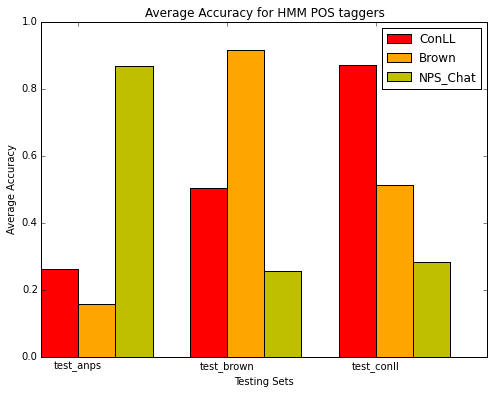

In [44]:
N = 3
sorted(datasets.keys()), sorted(test_eval.keys())
men_conll = [np.mean(evaluation_dict['conll2000',y]) for y in sorted(test_eval.keys())]
men_brown = [np.mean(evaluation_dict['obrown',y]) for y in sorted(test_eval.keys())]
men_nps = [np.mean(evaluation_dict['nps',y]) for y in sorted(test_eval.keys())]

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(ind, men_conll, width, color='r')
rects2 = ax.bar(ind+width, men_brown, width, color='orange')
rects3 = ax.bar(ind+2*width, men_nps, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Testing Sets')
ax.set_title('Average Accuracy for HMM POS taggers')
ax.set_xticks(ind + width)
ax.set_xticklabels(sorted(test_eval.keys()))

ax.legend((rects1[0], rects2[0], rects3[0]), ('ConLL', 'Brown', 'NPS_Chat'))
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

# 5. Learning Curves

In [45]:
def get_word_tags(tagged_sents):
    word_tags = []
    for sent in tagged_sents:
        word_tags.append(("START", "START"))
        word_tags.extend([(tag[:2], word) for (word, tag) in sent])
        word_tags.append(("END", "END"))
    return word_tags
indexes = [int(x) for x in np.linspace(0, len(train_conll_word_tags), 6)]
train_conll1 = get_word_tags(train_conll_word_tags[:indexes[1]])
train_conll2 = get_word_tags(train_conll_word_tags[:indexes[2]])
train_conll3 = get_word_tags(train_conll_word_tags[:indexes[3]])
train_conll4 = get_word_tags(train_conll_word_tags[:indexes[4]])
train_conll5 = get_word_tags(train_conll_word_tags[:indexes[5]])

In [46]:
print("Size of first chunk: ", len(train_conll1))
print("Size of second chunk: ", len(train_conll2))
print("Size of third chunk: ", len(train_conll3))
print("Size of fourth chunk: ", len(train_conll4))
print("Size of fifth chunk: ", len(train_conll5))

Size of first chunk:  50333
Size of second chunk:  101354
Size of third chunk:  152266
Size of fourth chunk:  202987
Size of fifth chunk:  252700


In [47]:
def train_model(train_brown, test_sents, test_tags, index):
    #Train for different training sizes
    cfd_tagwords = nltk.ConditionalFreqDist(list(train_brown))
    cpd_tagwords = nltk.ConditionalProbDist(cfd_tagwords, nltk.MLEProbDist)

    tags = [tag for (tag, word) in train_brown]
    words = [word for (tag, word) in train_brown]
    cfd_tags= nltk.ConditionalFreqDist(nltk.bigrams(tags))
    cpd_tags = nltk.ConditionalProbDist(cfd_tags, nltk.MLEProbDist)

    distinct_tags = set(tags)
    word_corpus = set(words)
    accuracies = []
    probabilities = []
    j = 0
    for i in range(len(test_sents)):
        prob_tagsequence, best_tagsequence = train_hmms(distinct_tags, cpd_tags, cpd_tagwords, cfd_tagwords, word_corpus, test_sents[i])
        accuracy,_,_,_,_ = evaluateAccuracy(test_tags[i], best_tagsequence, test_sents[i], word_corpus)
        accuracies.append(accuracy)
        probabilities.append(prob_tagsequence)
        if j%500 == 0: print('Samples processed: ', j)
        j += 1
    print('Accuracy for {data} is {acc}'.format(data=index, acc=np.mean(accuracies)))
    return accuracies, probabilities

In [49]:
evaluation_dict = {}
prob_dict = {}

accuracies, probabilities = train_model(train_conll1, conll_test_sents, conll_test_tags, 0)
evaluation_dict[0] = accuracies
prob_dict[0] = probabilities
accuracies, probabilities = train_model(train_conll2, conll_test_sents, conll_test_tags, 1)
evaluation_dict[1] = accuracies
prob_dict[1] = probabilities
accuracies, probabilities = train_model(train_conll3, conll_test_sents, conll_test_tags, 2)
evaluation_dict[2] = accuracies
prob_dict[2] = probabilities
accuracies, probabilities = train_model(train_conll4, conll_test_sents, conll_test_tags, 3)
evaluation_dict[3] = accuracies
prob_dict[3] = probabilities
accuracies, probabilities = train_model(train_conll5, conll_test_sents, conll_test_tags, 4)
evaluation_dict[4] = accuracies
prob_dict[4] = probabilities

Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 0 is 0.748952902465
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 1 is 0.812782542999
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 2 is 0.848775301334
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 3 is 0.863123750078
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 4 is 0.872557119489


In [58]:
nps_indexes = [int(x) for x in np.linspace(0, len(train_nps_word_tags), 6)]
train_nps1 = get_word_tags(train_nps_word_tags[:nps_indexes[1]])
train_nps2 = get_word_tags(train_nps_word_tags[:nps_indexes[2]])
train_nps3 = get_word_tags(train_nps_word_tags[:nps_indexes[3]])
train_nps4 = get_word_tags(train_nps_word_tags[:nps_indexes[4]])
train_nps5 = get_word_tags(train_nps_word_tags[:nps_indexes[5]])

evaluation_dict_nps = {}
prob_dict_nps = {}

accuracies, probabilities = train_model(train_nps1, nps_test_sents, nps_test_tags, 0)
evaluation_dict_nps[0] = accuracies
prob_dict_nps[0] = probabilities
accuracies, probabilities = train_model(train_nps2, nps_test_sents, nps_test_tags, 1)
evaluation_dict_nps[1] = accuracies
prob_dict_nps[1] = probabilities
accuracies, probabilities = train_model(train_nps3, nps_test_sents, nps_test_tags, 2)
evaluation_dict_nps[2] = accuracies
prob_dict_nps[2] = probabilities
accuracies, probabilities = train_model(train_nps4, nps_test_sents, nps_test_tags, 3)
evaluation_dict_nps[3] = accuracies
prob_dict_nps[3] = probabilities
accuracies, probabilities = train_model(train_nps5, nps_test_sents, nps_test_tags, 4)
evaluation_dict_nps[4] = accuracies
prob_dict_nps[4] = probabilities

Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 0 is 0.763277514822
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 1 is 0.811603045533
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 2 is 0.844340513695
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 3 is 0.852917817408
Samples processed:  0
Samples processed:  500
Samples processed:  1000
Accuracy for 4 is 0.868050812969


**Additionally we have run separetaly these curves for Brown corpus in order to save time. We have copied them here so we can compare them with the others HMM and their corresponding test sets.**

In [63]:
scores_brown = [0.839853634683, 0.883960873057, 0.901223829562, 0.910501021301, 0.917736878606]
indexes = ('20%', '40%', '60%', '80%', '100%')

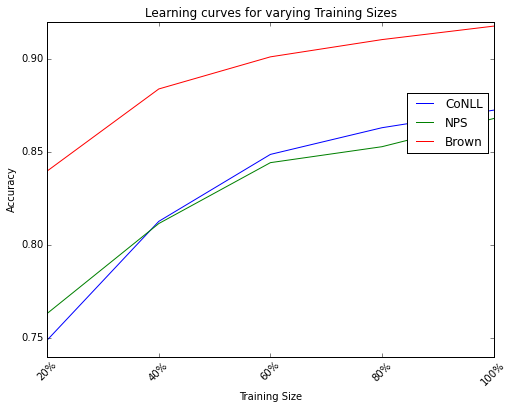

In [64]:
scores_conll = [np.mean(evaluation_dict[x]) for x in range(5)]
scores_nps = [np.mean(evaluation_dict_nps[x]) for x in range(5)]
plt.figure(figsize=(8, 6))
#for dataset in datasets:
#scores = list_pearson[dataset]
line1, = plt.plot(scores_conll, label="CoNLL")
line2, = plt.plot(scores_nps, label="NPS")
line3, = plt.plot(scores_brown, label="Brown")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(indexes)), indexes, rotation=45)
plt.title('Learning curves for varying Training Sizes')
plt.legend(bbox_to_anchor=(0.9, 0.75), bbox_transform=plt.gcf().transFigure)
plt.savefig('foo1.png', bbox_inches='tight')
plt.show()